# M1_T01 mySql

## Exercici 1 

A partir dels documents adjunts de text  (estructura i dades), crea una base de dades amb MySQL. Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.

* ***Tant la base de dades com les dades per la pràctica laa he creat directament amb el command line client de MySql apartir dels dos fitxers de texte indicats a la pràctica   del exercici. Amb Mysql workbench he fet l'ingenyeria inversa per extreure el diagrama entitat relació***

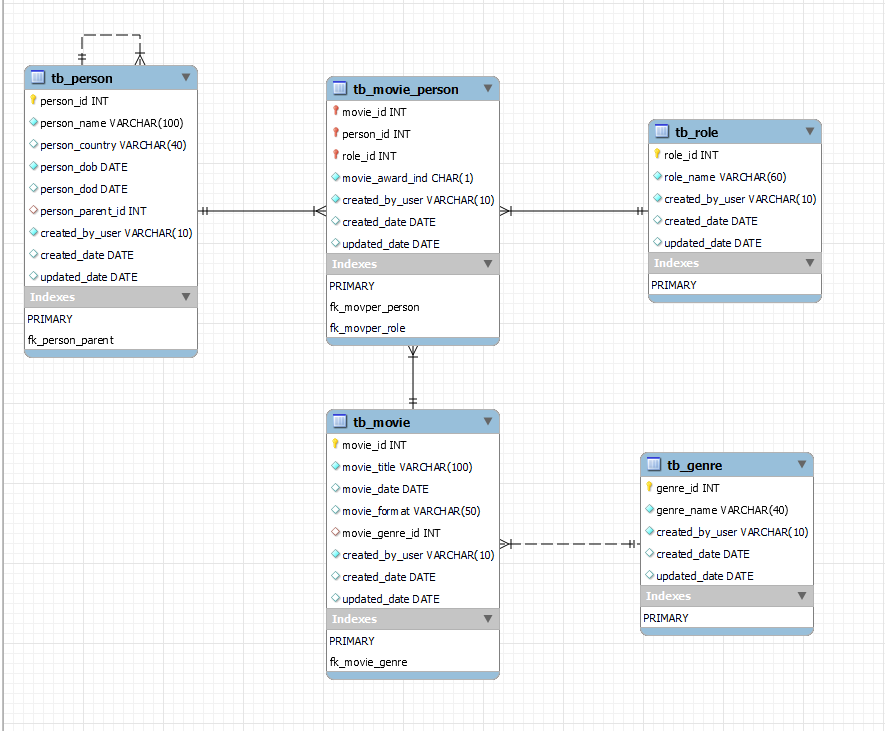

*** Descriurem primer les entitats i seguidament les relacions entre les entitats***

* Primer de tot direm que totes les taules tenen 3 atributs comuns ***created_by_User*** ( no null i  valor per defecte OS_SGAD) , ***created_DATE*** i ***updated_DATE***. Aquests dos atributs tenen un significat de control i mostra la data de creació , la data de última modificació i quin usuari ha realitzat el canvis, nortmalment son actualitzats automàticament quen es produeix qualsevol canvi.


* ***TAULES***


* ***Person:***


* Descriu els atributs de persona rellevant per ddescrriure els actors en aquest cas:
   - Clauu primaria ***person_id*** de tipus enter i no null.¡ que identifica univocament una persona

* Els atrbuts son : 
   - person_name:  es el nom de tipus texte variable  de fins 100 i no permet nul
   - person_country: es el pais de tipus texte variable  de fins 100 permet nul, 
   - person_dob,person_dod : son la data de neixament i defunció de tipus date i permet nul.
   - person_parent_id : Es el identificador corresponent al pare de la persona, es enter i permetr nul. Aquest te una clau   foranea a la mateixa taula,i identifica el pare de la persona en cas que en tingu


* ***Movie***


* Descriu els atributs per descriure una película(movie).

   - Clau primaria ***movie_id*** de tipus enter i no null. i identifica de forma única la persona
* Els atributs son : 
   - movie_title : es el titul de la película de tipus texte variable  de fins 100 i no permet nul-
   - movie_date : es la data de la película de tipus date .
   - movie_format : descriu format de la película de tipus texte variable  de fins 50 permet  nul, 

   - movie_genre_id: Es el identificador del genere de la apelícula de tipus enter i permet nul. Aquest te una clau   foranea a la taula ***genre** on des descriu el gènere.
   


* ***Genre***: 


* Enumera tots el posibles generes que pot ser una película*
   - Clau primaria ***genre_id*** de tipus enter i no null. i identifica de forma única un gènere
* Els atributs son : 
   - genre_name : la descripció del genere de tipus texte variable  de fins 40  i no permet nul-


* ***Role***: 


* Enumera tots el posibles roles que pot ser una persona en una película(Actor,Director,Guionista,Musica)*
   - Clau primaria ***role_id*** de tipus enter i no null. i identifica de forma única un role
* Els atributs son : 
   - role_name   : la descripció del role de tipus texte variable  de fins 60 i no permet nul-


* ***Movie_person:***



* Aquest entitat es creada per modelar una relació M-N-P entre movies, persones i roles. Es a dir una person (actor) pot tenir moltes películes i varis roles en la mateixa película , i una movie (pelicula) pot tenir moltes persones ( actors) amb diferents roles


   - Clau primaria ***movie_id,person_id,role_id***, de tipus enter i no nuls.Aquest camps identifican de forma única una movie_person , es a dir una persona  en una película i un role. Cadescun dels camps es a la vegada una clau forànea a les entitats ***movie,person i role*** respectivament

* Els atributs son : 
   - movie_award_ind: Identifica si la persona  ha aconseguit un premi en la película fent un determinat role, es de tipus caracter i a  la vista de les dades te valor Y ( si ) o N ( no) i no pot ser nul




***Per fer els seguents exercicis del modul primer establirem la conexió a la base de dades , previament hem instalat tot el necessari per conectar mySql a python***

In [96]:
import mysql.connector


In [140]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="20Feb65Xbm",
  database="movies"
)

print(mydb)

***Creo una funció per mostrar els resultats d'una consulta, li pasem el cursor, mostrem les seves files i el tancament sempre que el segon paràmetre no sigui "N"***

***Aquesta funcio la cridarem moltes vegades i evitarem codi****


In [98]:
# Mostra els resultats del la sentència i tanca el cursor

def showResultSql(mycursor,closeSN="S"):
    for tuples in mycursor:
        print(tuples)
    if (closeSN=="S"):
        mycursor.close()
    return



## - Exercici 2
Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom, el país i la data de naixement d'aquelles persones per les quals no consti una data de mort i ordenar les dades de la persona més vella a la persona més jove.

In [135]:
#Seleccionen les files de tb_person en que la data de defunció sigui nula, la ordenem i deixem la ordenacio per defecte
sql2= "SELECT person_name,person_country, person_dob FROM tb_person  WHERE person_dod IS  NULL ORDER BY person_dob"

In [100]:
myCursor2=mydb.cursor()

In [101]:
myCursor2.execute(sql2)

In [102]:
showResultSql(myCursor2)

    

('John Williams', 'United States', datetime.date(1928, 8, 8))
('Vera Miles', 'United States', datetime.date(1929, 8, 23))
('Sean Connery', 'Scotland', datetime.date(1930, 7, 8))
('Robert Duvall', 'United States', datetime.date(1931, 1, 5))
('Morgan Freeman', 'United States', datetime.date(1935, 10, 1))
('Francis Ford Coppola', 'United States', datetime.date(1939, 4, 7))
('Gary Kurtz', 'United States', datetime.date(1940, 7, 27))
('Martin Sheen', 'United States', datetime.date(1940, 8, 3))
('Harrison Ford', 'United States', datetime.date(1942, 7, 13))
('George Lucas', 'United States', datetime.date(1944, 5, 14))
('Carmine Coppola', 'United States', datetime.date(1945, 7, 8))
('Steven Spielberg', 'United States', datetime.date(1946, 12, 18))
('Tim Robbins', 'United States', datetime.date(1949, 6, 7))
('Mel Gibson', 'Australia', datetime.date(1950, 8, 9))
('Tom Hanks', 'United States', datetime.date(1956, 7, 9))
('Emilio Martinez Lazaro', 'Spain', datetime.date(1956, 9, 9))
('Karra Elejal

## - Exercici 3
Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom del gènere i el nombre total de pel·lícules d'aquest gènere i ordenar-ho per ordre descendent de nombre total de pel·lícules.  

***Enllacem les entitats tb_movie i tb_genre per seleccionar el nom del gènere , agrupem per nom del genère i coptem i ordenem de forma descendent***

In [136]:
sql3="SELECT genre_name, COUNT(*) AS MOVICOUNT FROM  tb_movie INNER JOIN tb_genre "\
      "ON tb_movie.movie_genre_id = tb_genre.genre_id GROUP BY genre_name  ORDER BY MOVICOUNT DESC"

In [137]:
myCursor3=mydb.cursor()
myCursor3.execute(sql3)

In [138]:
showResultSql(myCursor3)

('Comedia', 3)
('Acción', 2)
('Ciencia Ficción', 2)
('Drama', 2)
('Suspense', 2)
('Fantasía', 1)
('Romance', 1)
('Terror', 1)
('Bélico', 1)


## - Exercici 4

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir, per a cada persona, el seu nom i el nombre màxim de rols diferents que ha tingut en una mateixa pel·lícula. 

Posteriorment, mostra únicament aquelles persones que hagin assumit més d'un rol en una mateixa pel·lícula.

***Per fer aquesta consukta hem de treballar un subquery on contarem per cada persona i película les vegades que te repeteix en la relacio tb_movie_person. Posteriorment en la query principal recofrerem la taula persona i la vincularem al la subquery pero només estarem interessats en el màxim de repeticions de la tupla persona,película***

In [106]:
sql4="SELECT person_name, MAX(t1.DIFROLES) AS TOTROLES FROM tb_person "\
      "INNER JOIN (SELECT person_id, COUNT(*) AS DIFROLES FROM tb_movie_person "\
      "GROUP BY person_id, movie_id ) AS t1 ON tb_person.person_id=t1.person_id GROUP BY person_name"


In [107]:
myCursor4=mydb.cursor()

myCursor4.execute(sql4)

In [108]:
showResultSql(myCursor4)

('Francis Ford Coppola', 3)
('Carmine Coppola', 1)
('Marlon Brando', 1)
('Robert Duvall', 1)
('Martin Sheen', 1)
('Harrison Ford', 1)
('George Lucas', 2)
('Gary Kurtz', 1)
('Steven Spielberg', 2)
('John Williams', 1)
('Tom Hanks', 1)
('Catherine Zeta-Jones', 1)
('Alfred Joseph Hitchcock', 3)
('Anthony Perkins', 1)
('Vera Miles', 1)
('Emilio Martinez Lazaro', 1)
('Dani Rovira', 1)
('Clara Lago', 1)
('Carmen Machi', 1)
('Karra Elejalde', 1)
('Daniel Sanchez Arevalo', 2)
('Quim Gutierrez', 1)
('Robert Alamo', 1)
('Hector Colome', 1)
('Veronica Echegui', 1)
('Patrick Criado', 1)
('Mel Gibson', 2)
('Morgan Freeman', 1)
('Tim Robbins', 1)
('Charlie Sheen', 1)


***Agafem la query anterior i afegim HAVING TOTROLES > 1, de forma que només ens mostrarà les repeticions mes grans que 1***

In [109]:
sql41="SELECT person_name, MAX(t1.DIFROLES) AS TOTROLES FROM tb_person INNER JOIN "\
      "(SELECT person_id, COUNT(*) AS DIFROLES FROM tb_movie_person GROUP BY person_id, movie_id ) AS t1 "\
      "ON tb_person.person_id=t1.person_id  GROUP BY person_name HAVING TOTROLES > 1 "

myCursor41=mydb.cursor()

myCursor41.execute(sql41)
showResultSql(myCursor41)

('Francis Ford Coppola', 3)
('George Lucas', 2)
('Steven Spielberg', 2)
('Alfred Joseph Hitchcock', 3)
('Daniel Sanchez Arevalo', 2)
('Mel Gibson', 2)


## - Exercici 5
Realitza la següent operació sobre la base de dades acabada de crear: 

Has de crear un nou gènere anomenat "Documental" el qual tingui com a identificador el nombre 69.

* ***Verifiquem tots els gèneres que hi han***
* ***Insertem el nou genere i afeim valor a els atributs de control***
* ***verifiquem que el nou genere s''bha introduit***

In [120]:
from datetime import date



In [119]:
sql51= "SELECT * FROM  tb_genre"
myCursor51=mydb.cursor()
myCursor51.execute(sql51)
showResultSql(myCursor51)

(1, 'Acción', 'OS_SGAD', None, None)
(2, 'Ciencia Ficción', 'OS_SGAD', None, None)
(3, 'Comedia', 'OS_SGAD', None, None)
(4, 'Drama', 'OS_SGAD', None, None)
(5, 'Fantasía', 'apermag', None, None)
(6, 'Melodrama', 'apermag', datetime.date(2018, 9, 1), datetime.date(2018, 9, 27))
(7, 'Musical', 'OS_SGAD', None, None)
(8, 'Romance', 'OS_SGAD', None, None)
(9, 'Suspense', 'OS_SGAD', None, None)
(10, 'Terror', 'OS_SGAD', None, None)
(11, 'Bélico', 'OS_SGAD', None, None)


In [122]:
today = date.today()

sql52= "INSERT INTO tb_genre (genre_id, genre_name,created_date,updated_date) VALUES (%s, %s, %s, %s)"
val = (69, "Documental",today,today)
myCursor52=mydb.cursor()
myCursor52.execute(sql52,val)

mydb.commit

<bound method CMySQLConnection.commit of <mysql.connector.connection_cext.CMySQLConnection object at 0x0000017A3540B190>>

In [123]:
sql51= "SELECT * FROM  tb_genre"
myCursor51=mydb.cursor()
myCursor51.execute(sql51)
showResultSql(myCursor51)

(1, 'Acción', 'OS_SGAD', None, None)
(2, 'Ciencia Ficción', 'OS_SGAD', None, None)
(3, 'Comedia', 'OS_SGAD', None, None)
(4, 'Drama', 'OS_SGAD', None, None)
(5, 'Fantasía', 'apermag', None, None)
(6, 'Melodrama', 'apermag', datetime.date(2018, 9, 1), datetime.date(2018, 9, 27))
(7, 'Musical', 'OS_SGAD', None, None)
(8, 'Romance', 'OS_SGAD', None, None)
(9, 'Suspense', 'OS_SGAD', None, None)
(10, 'Terror', 'OS_SGAD', None, None)
(11, 'Bélico', 'OS_SGAD', None, None)
(69, 'Documental', 'OS_SGAD', datetime.date(2022, 7, 13), datetime.date(2022, 7, 13))



## - Exercici 6
Fes la següent operació sobre la base de dades acabada de crear:  

Elimina la pel·lícula "La Gran Familia Española" de la base de dades.

* ***IMPORTANT*** Si intentem eliminar la película de la taula tb_movie ens dona un missatge d'error d'integritat  ja que hi han files  a la entitat tb_movie_person que tenen aquesta  película con a clau forànea.


* Per tant per evitar  un error d'integritat hem d'esborrar aquesta película primer de totes les files de  la entitat tb_movie_person i posteiorment eliminar a tb_movie***



***Verifiquem les instancies de la película "La Gran Familia Española" a la entitat relacio tb_movie_person***

In [124]:
# Veiem el nombre de vegades que cada pelicula apreix en tb_movie_person
# La Gran Familia apareix 7 vegades
sql60= "SELECT tb_movie_person.movie_id , movie_title ,COUNT(*) FROM tb_movie_person "\
       "INNER JOIN tb_movie ON tb_movie.movie_id=tb_movie_person.movie_id "\
       "GROUP BY movie_title , tb_movie_person.movie_id"

myCursor60=mydb.cursor()


myCursor60.execute(sql60)
showResultSql(myCursor60,"N")

(1, 'Apocalypse Now', 9)
(2, 'Star Wars:Episode IV - A New Hope', 3)
(3, 'Indiana Jones and the Temple of Doom', 5)
(4, 'The Terminal', 4)
(5, 'Jaws', 1)
(6, 'ET The Extraterrestrial', 1)
(7, 'Psycho', 5)
(8, 'Ocho Apellidos Vascos', 5)
(9, 'Ocho Apellidos Catalanes', 5)
(10, 'El otro lado de la cama', 1)
(11, 'La Gran Familia Española', 7)
(13, 'Braveheart', 2)
(14, 'The Shawshank Redemption', 2)


***Eliminem  les instancies de la película "La Gran Familia Española" a la entitat relacio tb_movie_person , el codi de la pelíccula es 11 , també el podiem haver idenificat amb una subquery***

In [125]:
sql61 = "DELETE FROM tb_movie_person WHERE movie_id = 11"

myCursor61=mydb.cursor()
myCursor61.execute(sql61)

mydb.commit

<bound method CMySQLConnection.commit of <mysql.connector.connection_cext.CMySQLConnection object at 0x0000017A3540B190>>

***Confirmen que hem elimnat la pelicula de la entitat tb_movie_person***

In [126]:
sql62= "SELECT tb_movie_person.movie_id , movie_title ,COUNT(*) FROM tb_movie_person "\
       "INNER JOIN tb_movie ON tb_movie.movie_id=tb_movie_person.movie_id "\
       "GROUP BY movie_title , tb_movie_person.movie_id"

myCursor62=mydb.cursor()


myCursor62.execute(sql62)
showResultSql(myCursor62)

(1, 'Apocalypse Now', 9)
(2, 'Star Wars:Episode IV - A New Hope', 3)
(3, 'Indiana Jones and the Temple of Doom', 5)
(4, 'The Terminal', 4)
(5, 'Jaws', 1)
(6, 'ET The Extraterrestrial', 1)
(7, 'Psycho', 5)
(8, 'Ocho Apellidos Vascos', 5)
(9, 'Ocho Apellidos Catalanes', 5)
(10, 'El otro lado de la cama', 1)
(13, 'Braveheart', 2)
(14, 'The Shawshank Redemption', 2)


***Ara ja podem eliminar la película de la entitat tb_movie ja qu eno violarem regles d'integritat***

In [127]:
sql64 = "SELECT * FROM tb_movie"

myCursor64=mydb.cursor()
myCursor64.execute(sql64)
showResultSql(myCursor64)

(1, 'Apocalypse Now', datetime.date(1979, 5, 10), 'Film', 11, 'OS_SGAD', None, None)
(2, 'Star Wars:Episode IV - A New Hope', datetime.date(1977, 5, 25), 'Film', 2, 'OS_SGAD', None, None)
(3, 'Indiana Jones and the Temple of Doom', datetime.date(1984, 5, 8), 'Film', 1, 'OS_SGAD', None, None)
(4, 'The Terminal', datetime.date(2004, 6, 18), 'Digital', 3, 'OS_SGAD', None, None)
(5, 'Jaws', datetime.date(1975, 1, 1), 'Film', 10, 'OS_SGAD', None, None)
(6, 'ET The Extraterrestrial', datetime.date(1982, 7, 25), 'Film', 5, 'OS_SGAD', None, None)
(7, 'Psycho', datetime.date(1960, 5, 6), 'Film', 9, 'OS_SGAD', None, None)
(8, 'Ocho Apellidos Vascos', datetime.date(2014, 3, 14), 'Digital', 3, 'OS_SGAD', None, None)
(9, 'Ocho Apellidos Catalanes', datetime.date(2016, 6, 9), 'Digital', 8, 'OS_SGAD', None, None)
(10, 'El otro lado de la cama', datetime.date(2002, 9, 4), 'Digital', 8, 'OS_SGAD', None, None)
(11, 'La Gran Familia Española', datetime.date(2012, 10, 15), 'Digital', 3, 'OS_SGAD', None, N

***Eliminem la pelicula de la entitat tb_movie***

In [128]:
sql65 = "DELETE FROM tb_movie WHERE movie_title = 'La Gran Familia Española'"

myCursor65=mydb.cursor()
myCursor65.execute(sql65)
mydb.commit

<bound method CMySQLConnection.commit of <mysql.connector.connection_cext.CMySQLConnection object at 0x0000017A3540B190>>

***Confirmen que la pelicula s'ha eliminat***


In [129]:
sql64 = "SELECT * FROM tb_movie"

myCursor64=mydb.cursor()
myCursor64.execute(sql64)
showResultSql(myCursor64)

(1, 'Apocalypse Now', datetime.date(1979, 5, 10), 'Film', 11, 'OS_SGAD', None, None)
(2, 'Star Wars:Episode IV - A New Hope', datetime.date(1977, 5, 25), 'Film', 2, 'OS_SGAD', None, None)
(3, 'Indiana Jones and the Temple of Doom', datetime.date(1984, 5, 8), 'Film', 1, 'OS_SGAD', None, None)
(4, 'The Terminal', datetime.date(2004, 6, 18), 'Digital', 3, 'OS_SGAD', None, None)
(5, 'Jaws', datetime.date(1975, 1, 1), 'Film', 10, 'OS_SGAD', None, None)
(6, 'ET The Extraterrestrial', datetime.date(1982, 7, 25), 'Film', 5, 'OS_SGAD', None, None)
(7, 'Psycho', datetime.date(1960, 5, 6), 'Film', 9, 'OS_SGAD', None, None)
(8, 'Ocho Apellidos Vascos', datetime.date(2014, 3, 14), 'Digital', 3, 'OS_SGAD', None, None)
(9, 'Ocho Apellidos Catalanes', datetime.date(2016, 6, 9), 'Digital', 8, 'OS_SGAD', None, None)
(10, 'El otro lado de la cama', datetime.date(2002, 9, 4), 'Digital', 8, 'OS_SGAD', None, None)
(12, 'El dia de la bestia', datetime.date(1994, 12, 25), 'Film', 1, 'OS_SGAD', None, None)
(13

## - Exercici 7

Realitza la següent operació sobre la base de dades acabada de crear: 

Canvia el gènere de la pel·lícula "Ocho apellidos catalanes" perquè consti com a comèdia i no com a romàntica.

***Comprovem elgenere inicial de la película***

In [130]:
sql70 = "SELECT  movie_title, genre_name FROM  tb_movie LEFT JOIN tb_genre ON genre_id=movie_genre_id "\
        "WHERE movie_title ='Ocho apellidos catalanes'"
myCursor70=mydb.cursor()
myCursor70.execute(sql70)
showResultSql(myCursor70)


('Ocho Apellidos Catalanes', 'Romance')


***Assignem el identificador del genere Comedia que el busquem aamb una subselect***

In [131]:
sql71 = "UPDATE tb_movie SET movie_genre_id = (SELECT genre_id FROM tb_genre WHERE genre_name ='Comedia') "\
        "WHERE movie_title ='Ocho apellidos catalanes'"

myCursor71=mydb.cursor()
myCursor71.execute(sql71)


***Comprovem que el canvi es correcte***

In [142]:
sql70 = "SELECT  movie_title, genre_name FROM  tb_movie LEFT JOIN tb_genre ON genre_id=movie_genre_id "\
        " WHERE movie_title ='Ocho apellidos catalanes'"
myCursor70=mydb.cursor()
myCursor70.execute(sql70)
showResultSql(myCursor70)

('Ocho Apellidos Catalanes', 'Romance')
